<a href="https://colab.research.google.com/github/Tiwari666/Time_Series/blob/main/ARIMA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/macro_monthly.csv',parse_dates=True)
df

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.400
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.900
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.400
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.000
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.800
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
486,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
487,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338
488,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017


# **Variables:**

DATE: Date (possibly representing time)

unrate: Unemployment Rate

psr: Personal Savings Rate

m2: M2 Money Stock

dspic: Disposable Personal Income

pce: Personal Consumption Expenditures

reer: Real Effective Exchange Rate

ir: Interest Rate

ffer: Federal Funds Effective Rate

tcs: Total Construction Spending

indpro: Industrial Production Index

ccpi: Consumer Price Index for All Urban Consumers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    490 non-null    object 
 1   unrate  490 non-null    float64
 2   psr     490 non-null    float64
 3   m2      490 non-null    float64
 4   dspic   490 non-null    float64
 5   pce     490 non-null    float64
 6   reer    334 non-null    float64
 7   ir      490 non-null    float64
 8   ffer    490 non-null    float64
 9   tcs     346 non-null    float64
 10  indpro  490 non-null    float64
 11  ccpi    490 non-null    float64
dtypes: float64(11), object(1)
memory usage: 46.1+ KB


In [ ]:
df.shape

(490, 12)

# **Dropping all rows with NaNs**

In [26]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9


In [27]:
df.shape

(334, 12)

# **Quick Overview of data:**

In [28]:
df.dtypes

DATE      datetime64[ns]
unrate           float64
psr              float64
m2               float64
dspic            float64
pce              float64
reer             float64
ir               float64
ffer             float64
tcs              float64
indpro           float64
ccpi             float64
dtype: object

In [ ]:
#converts the values in the 'DATE' column of DataFrame df to datetime format
# Converting the date into the date time object
df.DATE = pd.to_datetime(df.DATE)

In [29]:
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9


In [30]:
df.dtypes

DATE      datetime64[ns]
unrate           float64
psr              float64
m2               float64
dspic            float64
pce              float64
reer             float64
ir               float64
ffer             float64
tcs              float64
indpro           float64
ccpi             float64
dtype: object

In [31]:
df['DATE'].nunique()

334

In [32]:
df.duplicated().sum()

0

In [33]:
data = df.copy()
data

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.500
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.800
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.300
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.500
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.900
...,...,...,...,...,...,...,...,...,...,...,...,...
329,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
330,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
331,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338
332,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017


# **Calculating percentage change in the 'ccpi' to find inflation:**

fillna(0): Replaces the first missing values resulting from the percentage change calculation with 0.

In [35]:
data['cpi_pct_mom'] = round((data['ccpi'].pct_change().fillna(0))*100,2)
data['cpi_pct_yoy'] = round((data['ccpi'].pct_change(12).fillna(0))*100,2)
data

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,cpi_pct_mom,cpi_pct_yoy
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.500,0.00,0.00
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.800,0.19,0.00
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.300,0.32,0.00
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.500,0.13,0.00
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.900,0.26,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140,0.88,4.45
330,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054,0.33,4.23
331,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338,0.10,3.98
332,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017,0.24,4.04


# **Plotting the Trend of Macroeconomic Indicators:**

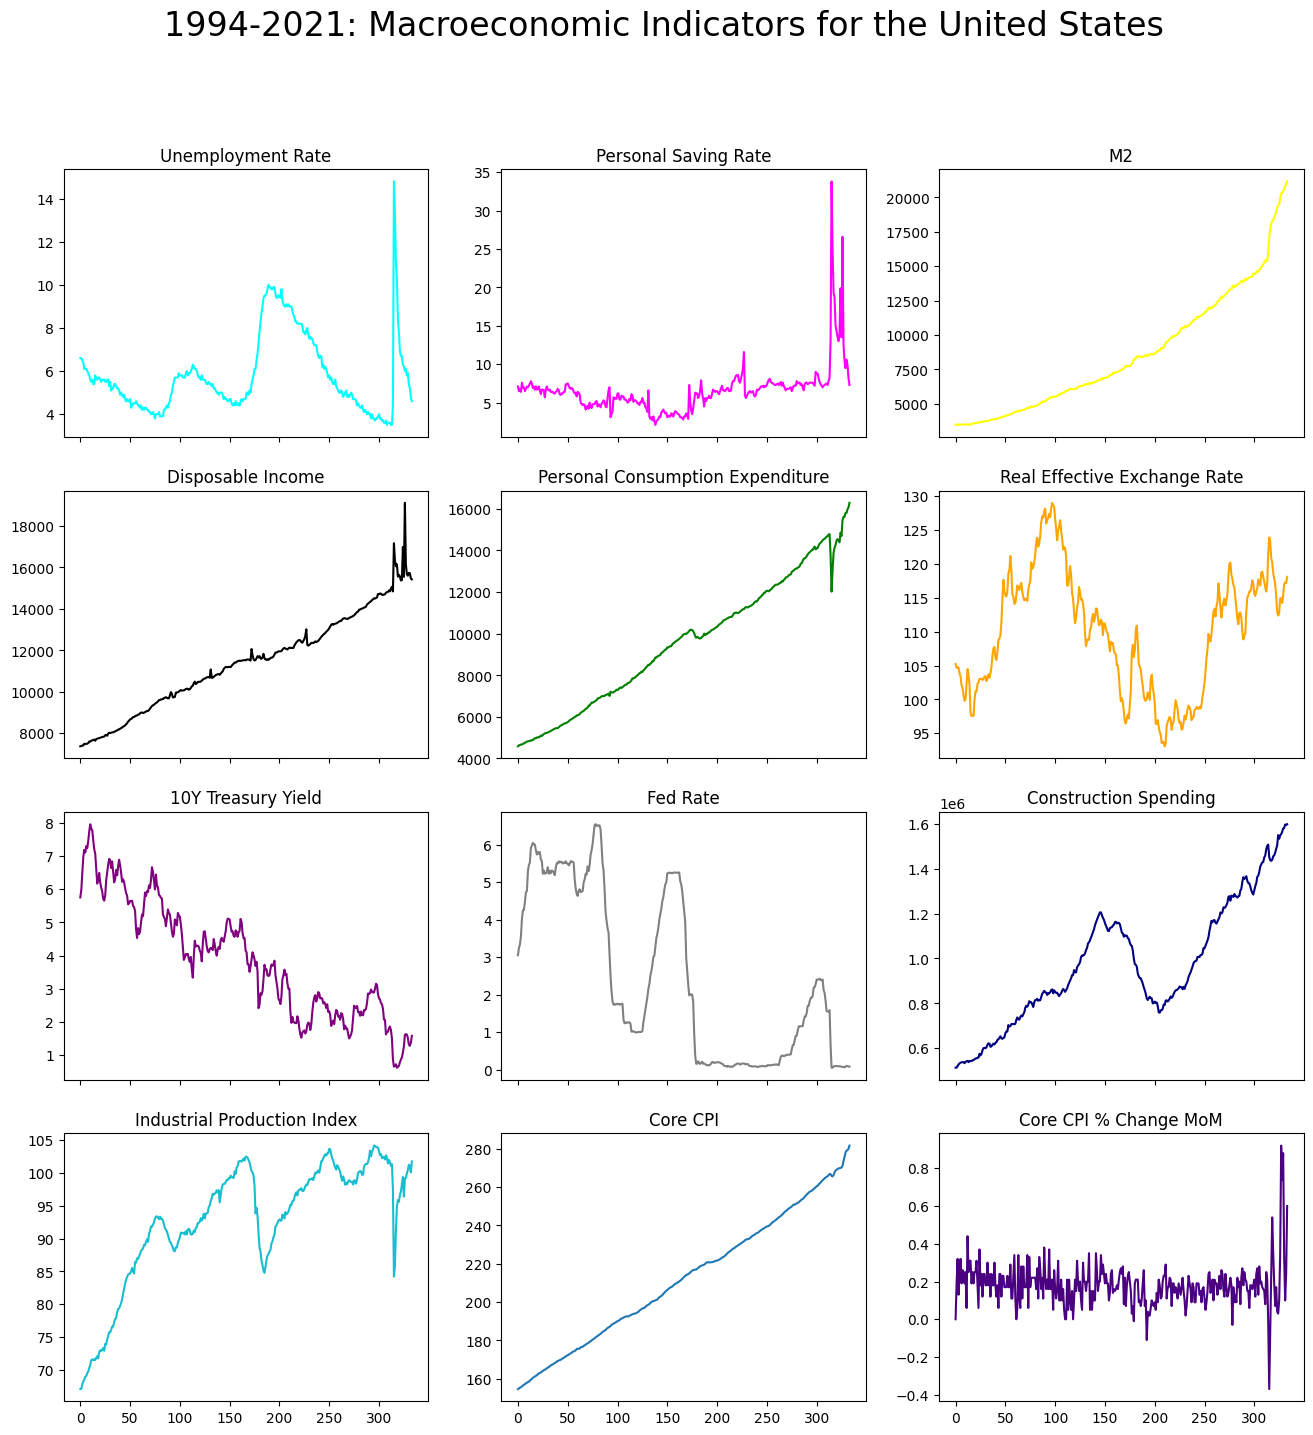

In [37]:
import matplotlib.pyplot as plt

# Define custom line colors
custom_colors = ['cyan', 'magenta', 'yellow', 'black', 'green', 'orange', 'purple', 'gray', 'navy', 'olive', 'teal', 'indigo']

# Plotting multiple line plots for columns in monthly_df
data.iloc[:, 1:13].plot(
    kind='line',
    subplots=True,
    figsize=(16, 16),
    title=['Unemployment Rate', 'Personal Saving Rate', 'M2', 'Disposable Income', 'Personal Consumption Expenditure', 'Real Effective Exchange Rate',
           '10Y Treasury Yield', 'Fed Rate', 'Construction Spending', 'Industrial Production Index', 'Core CPI', 'Core CPI % Change MoM'],
    legend=False,
    layout=(4, 3),
    sharex=True,
    style=custom_colors
)

# Adding a super title to the entire plot
plt.suptitle('1994-2021: Macroeconomic Indicators for the United States', fontsize=24)

# Display the plot
plt.show()

# **Extracting year, quarter, and month columns from the 'DATE' column for each row**

In [38]:
data['year'] = data['DATE'].apply(lambda x: x.year)
data['quarter'] = data['DATE'].apply(lambda x: x.quarter)
data['month'] = data['DATE'].apply(lambda x: x.month)
data

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,cpi_pct_mom,cpi_pct_yoy,year,quarter,month
0,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.500,0.00,0.00,1994,1,1
1,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.800,0.19,0.00,1994,1,2
2,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.300,0.32,0.00,1994,1,3
3,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.500,0.13,0.00,1994,2,4
4,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.900,0.26,0.00,1994,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140,0.88,4.45,2021,2,6
330,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054,0.33,4.23,2021,3,7
331,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338,0.10,3.98,2021,3,8
332,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017,0.24,4.04,2021,3,9


# **Core CPI trend by Month and Quarter:**

In [47]:
import plotly.express as px

# Create a box plot for month
fig_month = px.box(
    data[12:],  # Starting from the 13th row onwards
    x="month",
    y="cpi_pct_yoy",
    points="all",
    template="presentation"
)
fig_month.update_layout(xaxis=dict(tickmode='linear'))

# Create a box plot for quarter
fig_quarter = px.box(
    data[12:],  # Starting from the 13th row onwards
    x="quarter",
    y="cpi_pct_yoy",
    points="all",
    template="presentation"
)

# Display the plots
fig_month.show()
fig_quarter.show()

# **Core CPI trend by Year:**

In [41]:
import plotly.express as px

# Create a bar plot for month
fig_month = px.bar(
    data_frame=data.groupby(['month']).std().reset_index(),
    x="month",
    y="cpi_pct_yoy",
    text="cpi_pct_yoy"
)
fig_month.update_traces(texttemplate='%{text:0.3f}', textposition='outside')
fig_month.update_xaxes(nticks=13)

# Display the plot for month
fig_month.show()

# Create a bar plot for quarter
fig_quarter = px.bar(
    data_frame=data.groupby(['quarter']).std().reset_index(),
    x="quarter",
    y="cpi_pct_yoy",
    text="cpi_pct_yoy"
)
fig_quarter.update_traces(texttemplate='%{text:0.3f}', textposition='outside')
fig_quarter.update_xaxes(nticks=5)

# Display the plot for quarter
fig_quarter.show()


<ipython-input-41-585363dbb4b7>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-41-585363dbb4b7>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# **Data preprocessing for forcasting inflation using the ARIMA model:**

**Setting date as the dataframe's index:**

In [49]:
df = df.set_index('DATE')
df

,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
DATE,,,,,,,,,,,
1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.500
1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.800
1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.300
1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.500
1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.900
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338


# **Time Series Decomposition:**

Decomposing the data into trend, seasonal and residual components.

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

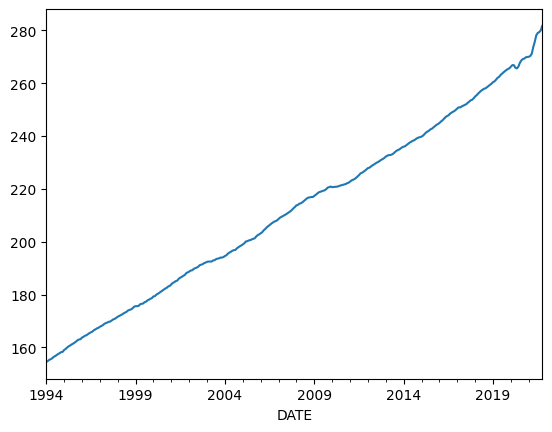

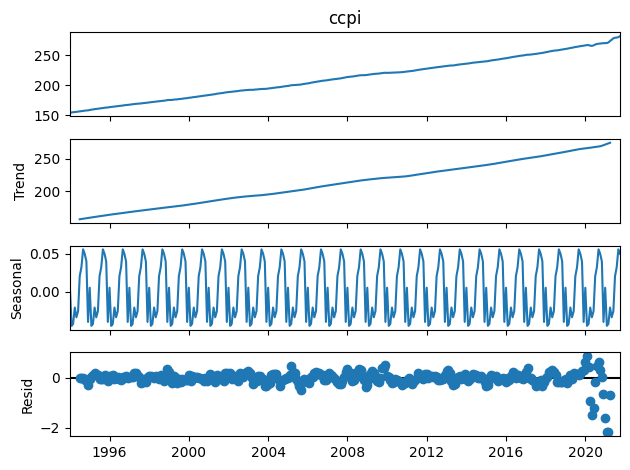

In [51]:
df['ccpi'].plot()
fig = seasonal_decompose(df['ccpi'], model='additive').plot()

The dataset exhibits a clear upward trend, indicating non-stationarity. Since the ARIMA model relies on the assumption of stationarity, it's essential to address this non-stationarity before proceeding with the modeling process.

# **Splitting the Data into the training and test:**

As the dataset is small, we will use the last 12 months as the out of sample test dataset.

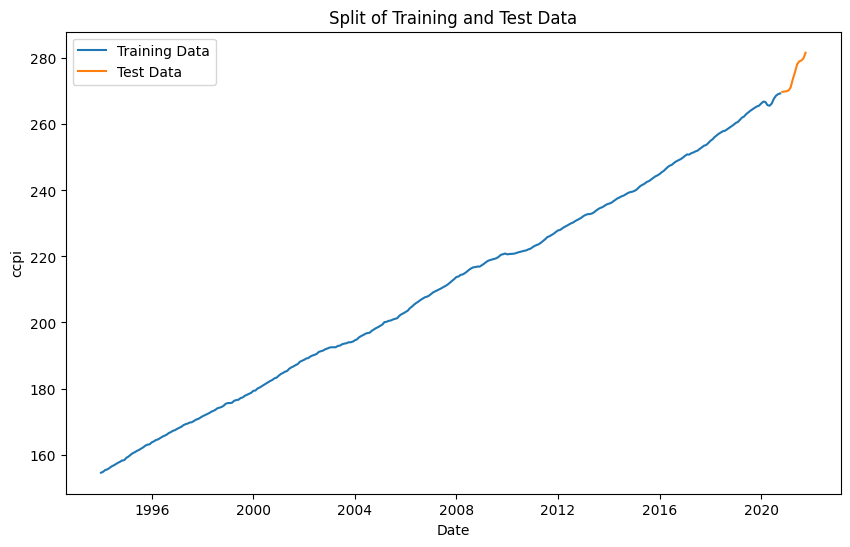

In [53]:
train = df[0:len(df) - 12]
test=df[len(df) - 12:]

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ccpi'], label='Training Data')
plt.plot(test.index, test['ccpi'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('ccpi')
plt.title('Split of Training and Test Data')
plt.legend()
plt.show()

The plot reveals a noticeable decline in 2020, attributed to the pandemic-related restrictions. The orange line represents the test set.

# **Taking the first differences to stationarize the ccpi**

Determining the optimal number of differencing operations required to eliminate a unit root and achieve stationarity in the time-series data is achieved by utilizing the diff() function and testing with the Augmented Dickey-Fuller test.

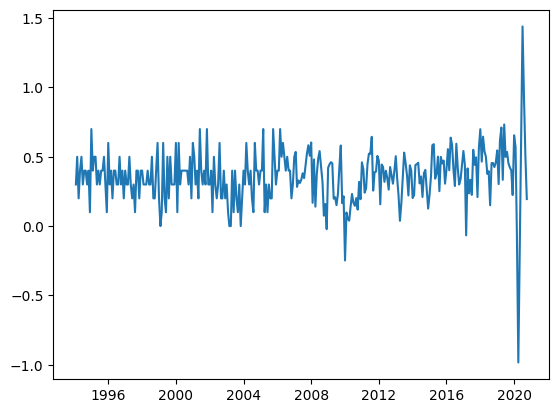

In [54]:
diff = train['ccpi'].diff()
plt.plot(diff)
plt.show()

# **Dropping the missing values (NaNs) from the DataFrame**

In [55]:
diff = diff.dropna()

# **Using the Augmented Dickey-Fuller test to verfy the stationary.**

In [57]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    if result[1] > 0.05:
        print("Series is not stationary.")
    else:
        print("Series is stationary.")

# Call the function with the 'diff' DataFrame or Series
adf_test(diff)

Series is stationary.
